<a href="https://colab.research.google.com/github/hyuntaedo/Data_Analysis/blob/main/openCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision을 위한 OpenCV
- 영상처리와 컴퓨터 비전을 위한 오픈소스
- C,C++,Python등에서 사용 가능

cv2.imread(file_name,flag)
- 이미지를 읽어 Numpy 객체로 만드는 함수
file_name : 읽고자하는 이미지 파일
flag : 이미지를 읽는 방법
-> IMREAD_COLOR : color로 읽고 투명은 무시
-> IMREAD_GRAY : 이미지를 grayscale로 읽기
-> IMREAD_UNCHANGED 이미지를 color로 읽고 투명도 읽기

cv2.imshow(title,image)
- title : 윈도우의 창
- image : 저장할 이미지 객체

cv2.imwrite(file_name,image)

특정한 파일로 저장하는 함수
- file_name : 저장할 이미지 이름
- image : 저장할 이미지 객체

cv2.waitKey(time)

키보드 입력을 처리하는 함수
- time: 입력 대기 시간(무한대기 : 0)
반환값 : ascii코드가 반환

cv2.destoryAllWindows()

화면의 모든 윈도우를 닫는 함수


In [ ]:
import cv2

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cat.png to cat.png


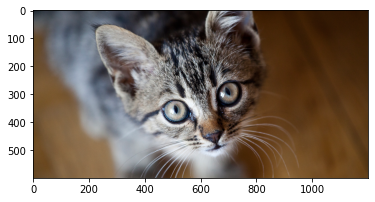

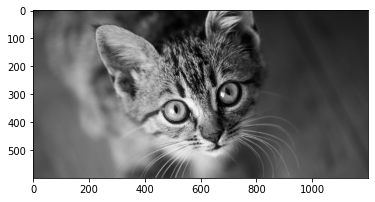

In [ ]:
#openCV : [B,G,R] / Matplotlib : [R,G,B]

import matplotlib.pyplot as plt
img_basic = cv2.imread('cat.png',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic,cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

#OpenCV 이미지 연산

In [ ]:
import cv2
image = cv2.imread('cat.png')

#픽셀 수 및 이미지 크기
print(image.shape)
print(image.size)

#이미지 Numpy객체의 특정 픽셀을 가리킴
px = image[100,100]

#BGR순서로 출력, 단 GrayScale인 경우 B,G,R로 구분되지 않음
print(px)

#R값만 출력
print(px[2])

(600, 1200, 3)
2160000
[136 119 105]
105


--- 0.0227353572845459 second ---
--- 0.0006592273712158203 second ---


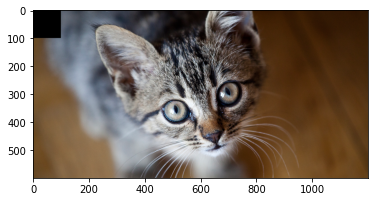

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

start_time = time.time()
for i in range(0,100):
    for j in range(0,100):
        image[i,j] = [255,255,255]
print("--- %s second ---" % (time.time() - start_time))

start_time = time.time()
image[0:100,0:100] = [0,0,0] #image slicing기법을 쓰면 속도가 훨씬 줄어듦
print("--- %s second ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

#ROI 추출 및 복사

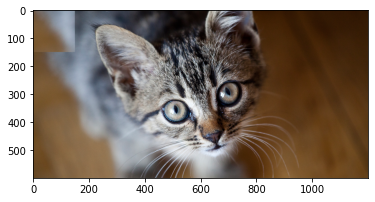

In [ ]:
roi = image[200:350,50:200]
image[0:150,0:150] = roi
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

#픽셀 별 색상 다루기

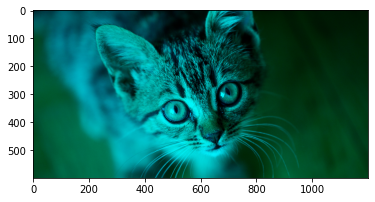

In [ ]:
image = cv2.imread('cat.png')
image[:,:,2] = 0
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 크기 조정(transformation)

늘어난 이미지에서 픽셀은 존재안하던 픽셀들인데 무언가 어색하게 안 느껴지는 이유는 이미지를 늘릴 때 중간에 늘어나는 픽셀은 interpolation을 사용한다

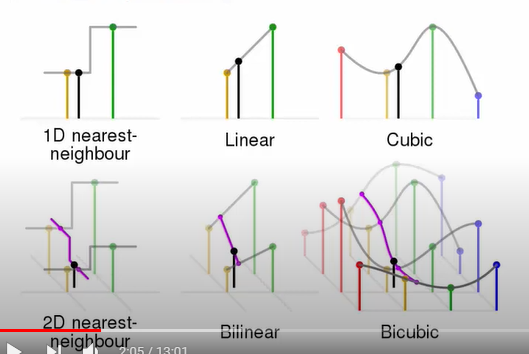

cv2.resize(image,dsize,fx,fx,interpolation)

- dsize = Manual Size
- fx : 가로 비율
- fy : 세로 비율
- interpolation : 보간법

INTER_CUBIC : 사이즈를 크게 할 때 사용

INTER_AREA : 사이즈를 작게 할 때 사용

보간법 : 사이즈가 변할 때 픽셀 사이 값을 조절하는 방법

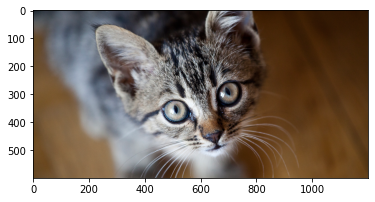

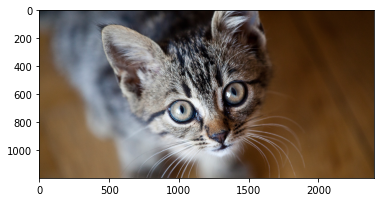

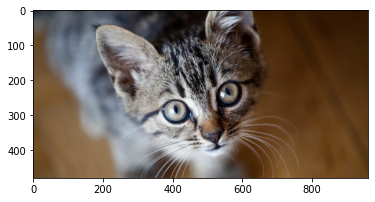

In [ ]:
image = cv2.imread('cat.png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image,None,fx=2.0,fy=2.0,interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand,cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image,None,fx=0.8,fy=0.8,interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink,cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 위치 변경

cv2.warpAffine(image,M,dszie) : 이미지의 위치 변경

M : 변환 행렬

dsize : Manual Size

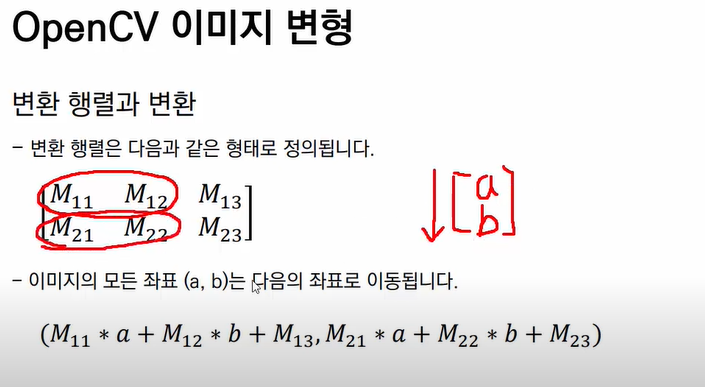

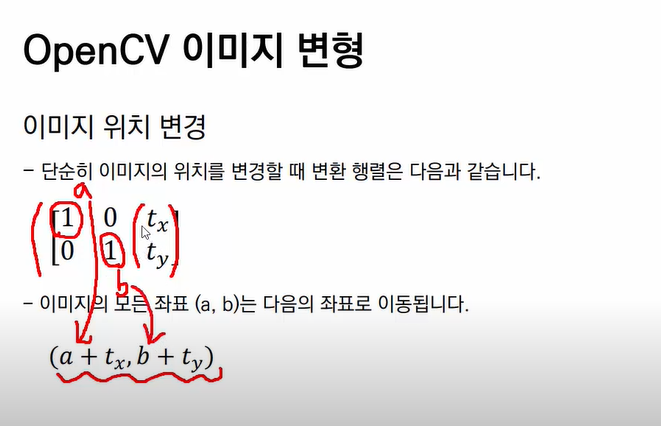

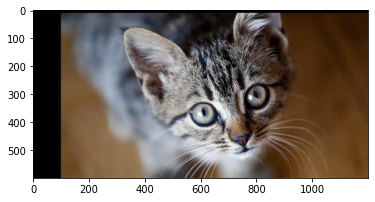

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('cat.png')
height,width = image.shape[:2]
M = np.float32([[1,0,100], [0,1,10]])
dst = cv2.warpAffine(image,M,(width,height))
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

#이미지 회전

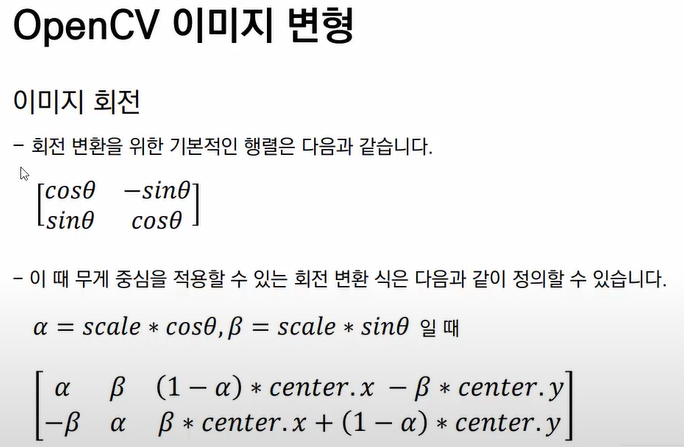

cv2.getRotationMatrix2D(center,angle,scale)
- center = 회전 중심
- angle = 회전 각도
- scale = Scale Factor

[[-5.000000e-01  6.123234e-17  9.000000e+02]
 [-6.123234e-17 -5.000000e-01  4.500000e+02]]


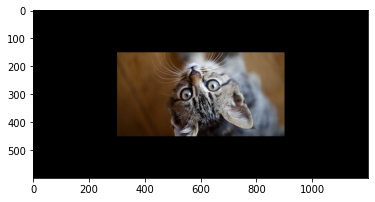

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
height,widht = image.shape[:2]
M = cv2.getRotationMatrix2D((width/2,height/2),180,0.5)
print(M)
dst = cv2.warpAffine(image,M,(width,height))
plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 합치기

이미지 합치는 방법
-  cv2.add() : Saturation 연산을 수행

   0보다 작으면 0,255 0보다 크면 255로 표현
-  np.add() : Modulo연산을 수행

    256은 0, 257은 1로 표현

In [2]:
from google.colab import files
uploaded = files.upload()

Saving image_1.jpg to image_1.jpg


In [3]:
from google.colab import files
uploaded = files.upload()

Saving image_2.png to image_2.png


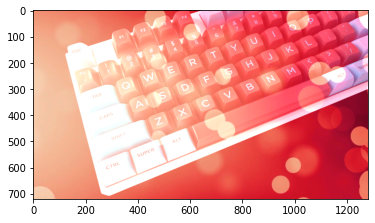

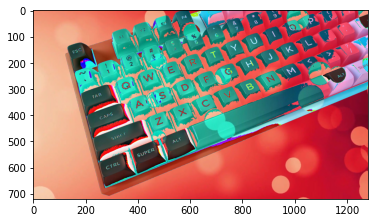

In [4]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread('image_1.jpg')
image_2 = cv2.imread('image_2.png')

result = cv2.add(image_1, image_2) #add
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

result = image_1 + image_2 #numpy 기본
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()

#임계점 처리하기

이미지의 기본 이진화

cv2.threshold(image,thresh,max_value,type)

임계값을 기준으로 흑/백으로 분류하는 함수

- image : 처리할 gray sacle이미지
- thresh : 임계값(전체 픽셀에 적용)
- max_value : 임계값을 넘었을 때 적용할 값
- type : 임계값을 처리하는 방식

THRESH_BINARY : 임계값 보다 크면 max_value 작으면 0

THRESH_BINARY_INV : 임계값 보다 작으면 max_value, 크면 0

THRESH_RUNC : 임계값 보다 크면 임계값, 작으면 그대로

THRESH_TOZERO : 임계값 보다 크면 그대로 작으면 0

THRESH_TOZERO_INV : 임계값 보다 크면 0 작으면 그대로

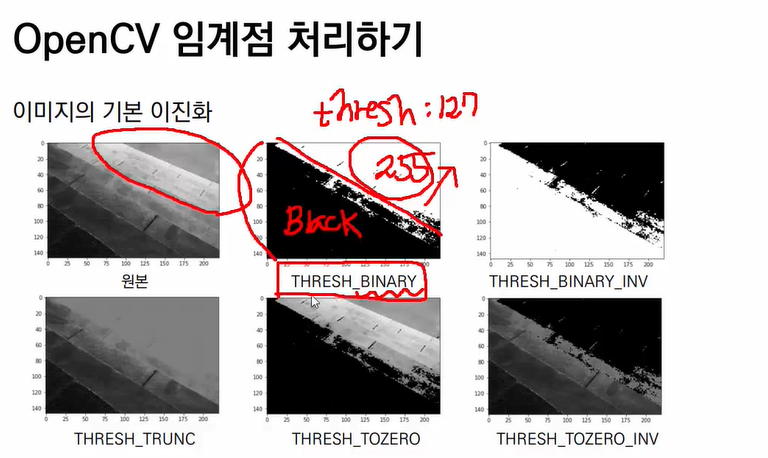

In [5]:
from google.colab import files
upload = files.upload()

Saving gray_image.jpg to gray_image.jpg


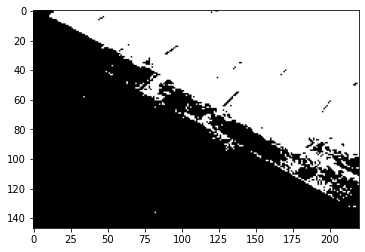

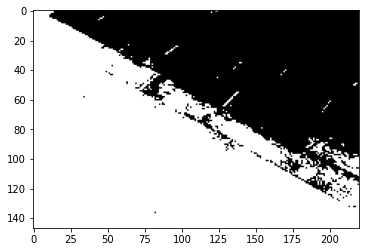

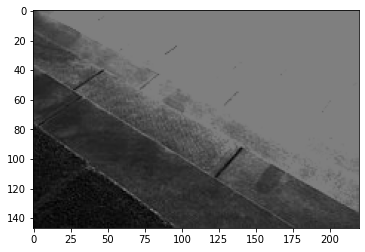

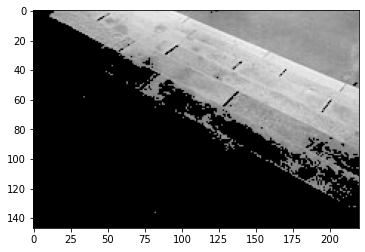

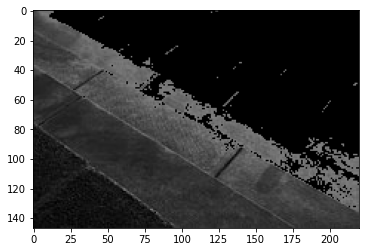

In [6]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)

images = []
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

for i in images:
  plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
  plt.show()

이미지의 적응 임계점 처리
- 하나의 이미지에 다수의 조명 상태가 존재하는 경우에 사용

cv2.adaptiveThreshold(image,max_value,adaptive_method,type,block_size,C)

Adaptive Threshold를 사용하면 전체 픽셀을 기준으로 사용

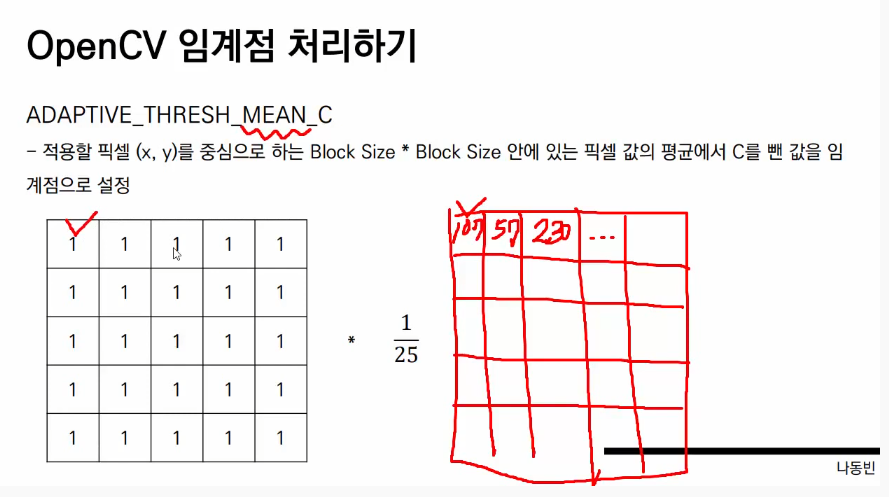

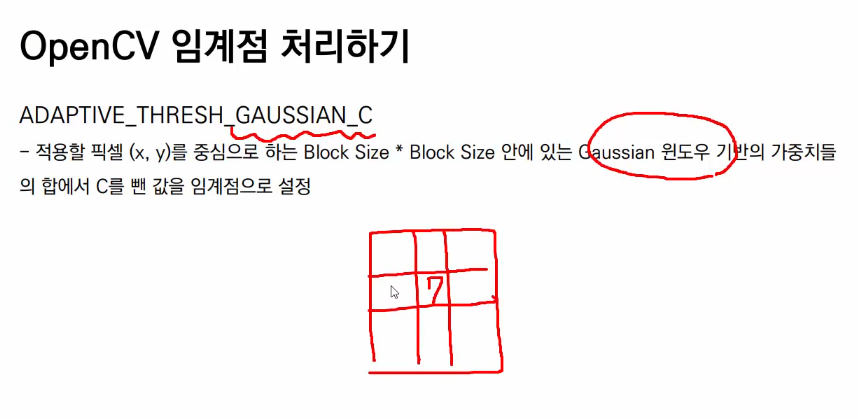

In [7]:
from google.colab import files
upload = files.upload()

Saving hand_writing_image.jpg to hand_writing_image.jpg


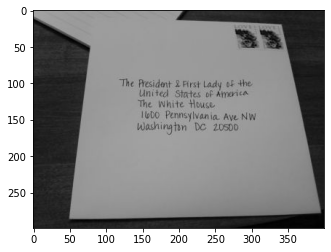

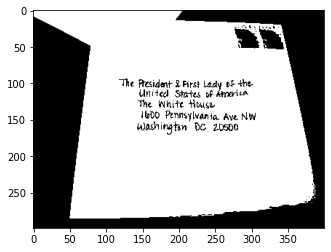

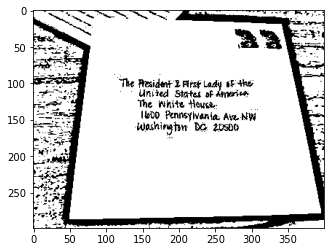

In [10]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('hand_writing_image.jpg',cv2.IMREAD_GRAYSCALE)
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1,cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2,cv2.COLOR_GRAY2RGB))
plt.show()

# Tracker 사용방법

cv2.createTrackbar(track_bar_name,window_name,value,count,on_change)

- value : 초기값
- count : Maxrkqt (Min:0)
- on_change : 값이 변경될 때 호출되는 callback함수

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def change_color(x):
    r = cv2.getTrackbarPos("R","Image")
    g = cv2.getTrackbarPos("G","Image")
    b = cv2.getTrackbarPos("B","Image")
    image[:] = [b,g,r]
    cv2.imshow("Image",image)
image = np.zeros((600,400,3),np.uint8)
cv2.namedWindow("Image")
cv2.createTrackbar("R","Image",0,255,change_color)
cv2.createTrackbar("G","Image",0,255,change_color)
cv2.createTrackbar("B","Image",0,255,chnage_color)

cv2.imshow('Image',image)
cv2.waitKeyt(0)

# OpenCV 도형 그리기

## 직선 그리기

cv2.line(image,start,end,color,tickness)

- start : 시작 좌표
- end : 종표 좌표
- tickness : 선의 두께

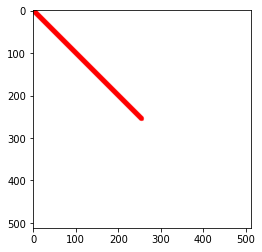

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = np.full((512,512,3), 255, np.uint8)
image = cv2.line(image,(0,0),(255,255),(255,0,0),10) #마지막 10은 두께
plt.imshow(image)
plt.show()

##사각형 그리기

cv2.rectangle(image,start,end,color,thickness)

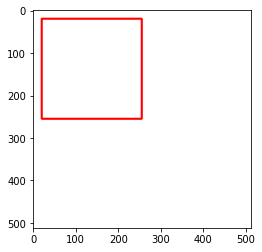

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = np.full((512,512,3), 255, np.uint8)
image = cv2.rectangle(image,(20,20),(255,255),(255,0,0),4) #마지막 10은 두께
plt.imshow(image)
plt.show()

##원 그리기


## 원그리기

cv2.circle(image,center,radian,color,thickness)

- center : 원의 중심
- radian : 반지름
- thickness : 선의 두께(채우기 : -1)

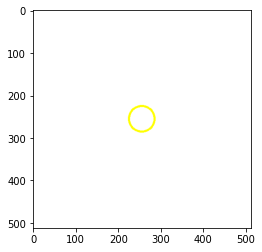

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512,512,3),255,np.uint8)
image = cv2.circle(image,(255,255),30,(255,255,0),3)

plt.imshow(image)
plt.show()

##다각형 그리기

cv2.polylines(image,points,is_closed,color,thickness)

- point : 꼭지점들

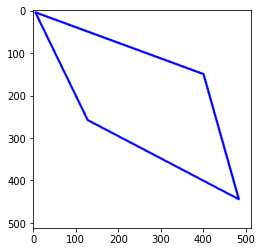

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512,512,3),255,np.uint8)
points = np.array([[5,5],[128,258],[483,444],[400,150]])
image = cv2.polylines(image,[points],True,(0,0,255),4)

plt.imshow(image)
plt.show()

## 텍스트 그리기

cv2.putText(image,text,position,font_type,font_sacle_color)

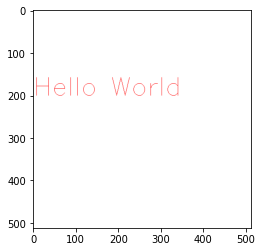

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = np.full((512,512,3),255,np.uint8)
image = cv2.putText(image,'Hello World',(0,200),cv2.FONT_ITALIC,2,(255,0,0))

plt.imshow(image)
plt.show()